### 🗂️ 데이터 구성
---
    1. use_log.csv : 센터의 이용 이력 데이터
    2. customer_master.csv : 2019년 3월 말 시점의 회원 데이터
    3. class_master.csv : 회원 구분 데이터 (종일/주간/야간)
    4. campaign_master.csv : 행사 구분 데이터

In [299]:
# 테크닉 21. 데이터를 읽어들이고 확인하자
import pandas as pd
uselog = pd.read_csv('use_log.csv', parse_dates=['usedate'])
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [300]:
customer = pd.read_csv('customer_master.csv', parse_dates=['start_date', 'end_date'])
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0


In [301]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [302]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [303]:
# 테크닉 22. 고객의 데이터를 가공하자
merged_data = pd.merge(how='left',
                       left=customer,
                       right=class_master,
                       on='class')
merged_data = pd.merge(how='left',
                       left=merged_data,
                       right=campaign_master,
                       on='campaign_id')
merged_data

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반


In [304]:
merged_data.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [305]:
# 테크닉 23. 고객 데이터를 집계하자
merged_data.groupby('class_name').agg('count')['customer_id']

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [306]:
merged_data.groupby('campaign_name').agg('count')['customer_id']

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [307]:
merged_data.groupby('gender').agg('count')['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [308]:
merged_data.groupby('is_deleted').agg('count')['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [309]:
# 테크닉 24. 최신 고객 데이터를 집계하자
customer_newer = merged_data.loc[(merged_data['end_date']>=pd.to_datetime('2019/03/31'))|(merged_data['end_date'].isna())]
customer_newer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반


In [310]:
customer_newer.groupby('class_name').count()['customer_id']

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [311]:
customer_newer.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [312]:
# 테크닉 25. 이용 이력 데이터를 집계하자
uselog['month'] = uselog['usedate'].dt.strftime('%Y%m')
uselog.drop(axis='columns', labels=['log_id'], inplace=True)

In [313]:
uselog_month = uselog.groupby(['month', 'customer_id'], as_index=False).count()
uselog_month.rename(columns={'usedate':'counts'}, inplace=True)
uselog_month

,month,customer_id,counts
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [314]:
uselog_customer = uselog_month.groupby(by=['customer_id'])['counts'].agg(['mean', 'median', 'max', 'min'])
uselog_customer

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


In [315]:
# 테크닉 26. 이용 이력 데이터로부터 정기 이용 플래그를 작성하자.
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog_weekday = uselog.groupby(by=['customer_id', 'month', 'weekday'], as_index=False).count()
uselog_weekday.rename(columns={'usedate':'count'}, inplace=True)
uselog_weekday

,customer_id,month,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [316]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]
uselog_weekday['routine_flg'] = 0
uselog_weekday

,customer_id,count,routine_flg
0,AS002855,5,0
1,AS008805,4,0
2,AS009013,2,0
3,AS009373,5,0
4,AS015233,5,0
...,...,...,...
4187,TS995853,5,0
4188,TS998593,5,0
4189,TS999079,5,0
4190,TS999231,5,0


In [319]:
# where은 주어진 조건이 만족하면, 유지 그렇지 않으면 1로 변경
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']<4, 1)
uselog_weekday

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


In [320]:
# 테크닉 27. 고객 데이터와 이용 데이터를 결합하자

In [322]:
merged_data = pd.merge(how='left',
                       left=merged_data,
                       right=uselog_customer,
                       on='customer_id')
merged_data

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11


In [323]:
merged_data = pd.merge(how='left',
                       left=merged_data,
                       right=uselog_weekday[['customer_id', 'routine_flg']],
                       on='customer_id')
merged_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [324]:
merged_data.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [326]:
# 테크닉 28. 회원 기간을 계산하자

In [337]:
merged_data['end_date'].fillna('2019/04/30', inplace=True)

/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_41808/1192379768.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['end_date'].fillna('2019/04/30', inplace=True)


In [339]:
from dateutil.relativedelta import relativedelta
merged_data['membership_period'] = 0
for i in range(len(merged_data)):
    delta = relativedelta(merged_data['end_date'].iloc[i], merged_data['start_date'].iloc[i])
    merged_data['membership_period'].iloc[i] = delta.years*12+delta.months
merged_data.head()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,2019-04-30,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,47
1,PL270116,XXXXX,C01,M,2015-05-01,2019-04-30,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,47
2,OA974876,XXXXX,C01,M,2015-05-01,2019-04-30,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,47
3,HD024127,XXXXX,C01,F,2015-05-01,2019-04-30,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,47
4,HD661448,XXXXX,C03,F,2015-05-01,2019-04-30,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,47


In [342]:
# 테크닉 29. 고객 행동의 각종 통계량을 파악하자
merged_data[['mean', 'median', 'max', 'min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [343]:
merged_data.groupby('routine_flg').count()['customer_id']

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

<Axes: >

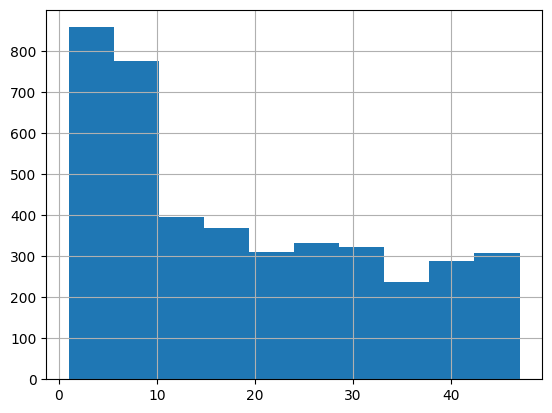

In [344]:
merged_data['membership_period'].hist()

In [346]:
merged_data.loc[merged_data['is_deleted']==1].describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350,1350,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,2018-01-20 10:45:20,2018-10-17 16:23:28,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
min,2016-05-01 00:00:00,2018-04-30 00:00:00,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2017-10-01 00:00:00,2018-06-30 00:00:00,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,2018-03-01 00:00:00,2018-10-31 00:00:00,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,2018-06-03 00:00:00,2019-01-31 00:00:00,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,2019-02-11 00:00:00,2019-03-31 00:00:00,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000
std,NaN,NaN,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692


In [347]:
merged_data.loc[merged_data['is_deleted']==0].describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842,2842,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,2017-04-03 22:42:28.627726848,2019-04-30 00:00:00,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
min,2015-05-01 00:00:00,2019-04-30 00:00:00,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,2016-05-01 00:00:00,2019-04-30 00:00:00,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,2017-04-01 00:00:00,2019-04-30 00:00:00,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,2018-04-05 00:00:00,2019-04-30 00:00:00,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,2019-03-15 00:00:00,2019-04-30 00:00:00,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000
std,NaN,NaN,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
